<a href="https://colab.research.google.com/github/traizooo/TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as a camera of a self driving car recognizing a car in front of it.

## Get the data

The images we're working with are from Food101 dataset (101 different classes of food).

Hovewer we've modified it to only use two classes (pizza 🍕 and steak 🥩) using the image data modification notebook. [Data Modification Notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet, what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-14 21:58:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   170MB/s    in 0.6s    

2023-03-14 21:58:34 (170 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of every machine learning project is becoming one with a data.

And for computer vision project this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

To visualize our images, first let's get class names programmatically.

In [ ]:
# Get the call names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the sub-directories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(f"Target Class: {target_class}")
  plt.axis("off");

  print(f"Image shape: {image.shape}") # show the shape of the image

  return image

Image shape: (384, 512, 3)


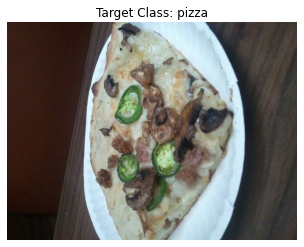

In [ ]:
# View a random image from training dataset
img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# The images we've imported and plotted are actually gian arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[55, 32, 26],
        [55, 32, 26],
        [54, 31, 25],
        ...,
        [65, 60, 41],
        [63, 58, 39],
        [61, 56, 37]],

       [[55, 32, 26],
        [55, 32, 26],
        [54, 31, 25],
        ...,
        [63, 57, 41],
        [62, 56, 40],
        [61, 55, 39]],

       [[55, 32, 26],
        [55, 32, 26],
        [54, 31, 25],
        ...,
        [62, 56, 44],
        [63, 57, 45],
        [64, 58, 46]],

       ...,

       [[20, 12,  9],
        [22, 14, 11],
        [23, 15, 12],
        ...,
        [45, 44, 42],
        [46, 45, 43],
        [45, 44, 42]],

       [[19, 11,  8],
        [22, 14, 11],
        [25, 17, 14],
        ...,
        [45, 44, 42],
        [45, 44, 42],
        [44, 43, 41]],

       [[16,  8,  5],
        [20, 12,  9],
        [24, 16, 13],
        ...,
        [45, 44, 42],
        [44, 43, 41],
        [43, 42, 40]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(384, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also reffered as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.21568627, 0.1254902 , 0.10196078],
        [0.21568627, 0.1254902 , 0.10196078],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.25490196, 0.23529412, 0.16078431],
        [0.24705882, 0.22745098, 0.15294118],
        [0.23921569, 0.21960784, 0.14509804]],

       [[0.21568627, 0.1254902 , 0.10196078],
        [0.21568627, 0.1254902 , 0.10196078],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.24705882, 0.22352941, 0.16078431],
        [0.24313725, 0.21960784, 0.15686275],
        [0.23921569, 0.21568627, 0.15294118]],

       [[0.21568627, 0.1254902 , 0.10196078],
        [0.21568627, 0.1254902 , 0.10196078],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.24313725, 0.21960784, 0.17254902],
        [0.24705882, 0.22352941, 0.17647059],
        [0.25098039, 0.22745098, 0.18039216]],

       ...,

       [[0.07843137, 0.04705882, 0.03529412],
        [0.08627451, 0.05490196, 0.04313725],
        [0.09019608, 0

## An end-to-end example

Let's build a convolusional neural network to find patterns in our images. More specifically, we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as a Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the CNN model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 230ms/step - loss: 0.5968 - accuracy: 0.6813 - val_loss: 0.4364 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4527 - accuracy: 0.8007 - val_loss: 0.3918 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4265 - accuracy: 0.8153 - val_loss: 0.3416 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3770 - accuracy: 0.8373 - val_loss: 0.3023 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3079 - accuracy: 0.8733 - val_loss: 0.3222 - val_accuracy: 0.8540


In [ ]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠️ **Practice/exercise:** Go through the CNN explainer website for a minimum of 10 minutes and compare our neural network

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 0.6961 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create a model (same as above but improved a little)

# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 188ms/step - loss: 4.3004 - accuracy: 0.5893 - val_loss: 1.2403 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 0.7392 - accuracy: 0.7153 - val_loss: 0.4646 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5345 - accuracy: 0.7660 - val_loss: 0.4385 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 9s 203ms/step - loss: 0.5029 - accuracy: 0.7740 - val_loss: 0.4584 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5776 - accuracy: 0.7447 - val_loss: 0.4327 - val_accuracy: 0.8100


In [ ]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parrameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it to our model, the main step here is scaling/normalizing and turning our data into batches)
3. Create a model (start with the baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


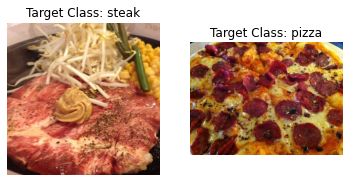

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for the model)

In [ ]:
# Define directory dataset paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ±10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

**Why 32?**

Beacuse 32 is good for your [health..](https://twitter.com/ylecun/status/989610208497360896?s=20)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the next batch of images, labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you set up when begining the machine learning experiment and then as you keep experimenting you try to beat a baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works with your data and then introduce complexity as required (e.g. look at which current model is performing

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create our model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across the input
           padding="valid", # if "same", output shape is the same as input shape, if "valid", otput shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # input layer, specify input shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
history_4 = model_4.fit(train_data, # this is combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 266ms/step - loss: 0.6098 - accuracy: 0.6567 - val_loss: 0.4269 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4556 - accuracy: 0.8027 - val_loss: 0.4007 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.2981 - accuracy: 0.8840 - val_loss: 0.4113 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.1596 - accuracy: 0.9540 - val_loss: 0.4012 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.0842 - accuracy: 0.9687 - val_loss: 0.4815 - val_accuracy: 0.8240


### 5. Evaluate the model

It looks like our model is learning something, let's evaluate it...

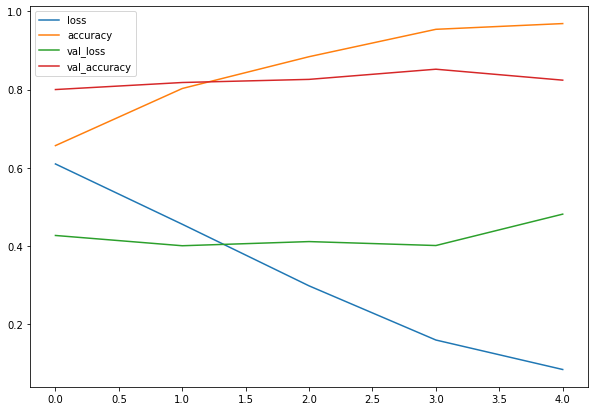

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

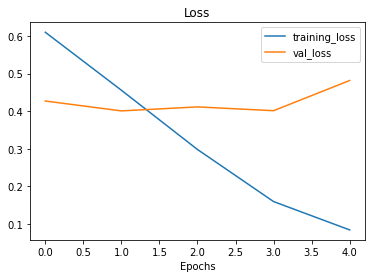

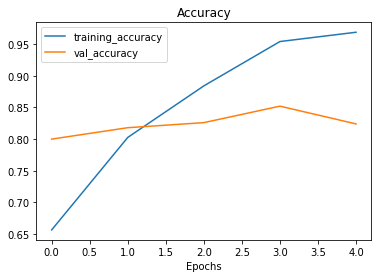

In [ ]:
# Check out loss and accuracy of model 4
plot_loss_curves(history_4)

> **Note:** Ideally, the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline (overfitting a larger model)
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 284ms/step - loss: 0.6325 - accuracy: 0.6487 - val_loss: 0.5105 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 15s 309ms/step - loss: 0.4587 - accuracy: 0.7920 - val_loss: 0.3877 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4225 - accuracy: 0.8013 - val_loss: 0.3570 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3971 - accuracy: 0.8240 - val_loss: 0.3605 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 13s 285ms/step - loss: 0.3781 - accuracy: 0.8280 - val_loss: 0.3188 - val_accuracy: 0.8820


In [ ]:
# Get the summary of our model with MaxPool2D
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

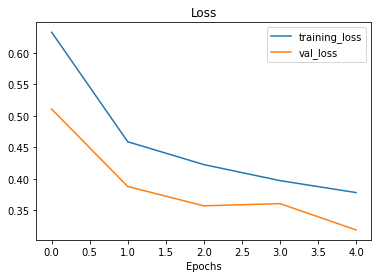

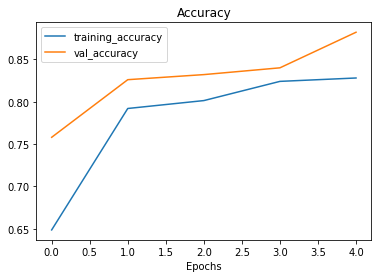

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2, # how much do you want to rotate an image?
                                              shear_range=0.2, # how much do you want to shear an image?
                                              zoom_range=0.2, # zoom in randomly on image
                                              width_shift_range=0.2, # move your image around on the x-axis
                                              height_shift_range=0.2, # move your image around on the y-axis
                                              horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🧐 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leaving it to have more diversity and in turn allowing our models to learn more generalisable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [ ]:
# Import data and augument it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False # for demonstration only
)
print("Non-augmented training data:")
# Create non-augumented train data batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Create non-augumented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augumentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories, but are modified as they're loaded into the model.

Finally, let's visualize some augumented data!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented.. only data (images)

Showing image number: 20


(-0.5, 223.5, 223.5, -0.5)

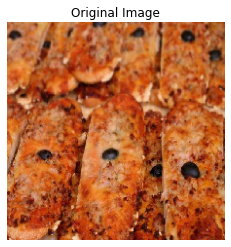

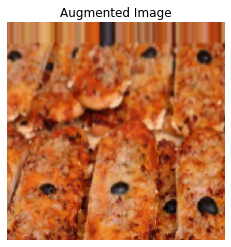

In [ ]:
# Show the original image and augmented one
import random
random_number = random.randint(0, 32) # our batch size is 32..
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

Now we've seen what augmented data looks like, let's build the model and see how it learns on augmented data.

In [ ]:
# Create the model, same as model 5
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 553ms/step - loss: 0.7408 - accuracy: 0.4933 - val_loss: 0.6815 - val_accuracy: 0.6180


In [ ]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our training data and augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

In [ ]:
# Create a model (same as model 5 and 6)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leaverage what another image model has learned and adjust it for our own use case

> 🛠️ **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data or new data is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to the be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and
  reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

Looks like our custom image is being put through our mode, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well asthe model's prediction

In [ ]:
# Remind ourselves of our class names
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with a model
  and plots the image with the predicted class as a title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot an image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/traizooo/traizooo/main/pizza.jpeg
pred_and_plot(model_7, "pizza.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/traizooo/traizooo/main/steak1.jpeg
pred_and_plot(model_7, "steak1.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza/steak). Now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create the model (start with the baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close

In [ ]:
import os

# Walk throught 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories in {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup the train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(train_dir, random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

### 3. Create a model (start with the baseline)

We've been talking a lot about the CNN Explainer website... How about we just take their model (also on 10 classes) and use it for our problem..?

In [ ]:
import tensorflow as tf

# Create our model (very similar to our previous models)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile our model
model_8.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

### 4. Fit the model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 219ms/step - loss: 2.1145 - accuracy: 0.2372 - val_loss: 1.9596 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 51s 216ms/step - loss: 1.8428 - accuracy: 0.3628 - val_loss: 1.8619 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.5121 - accuracy: 0.4889 - val_loss: 1.8999 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 50s 215ms/step - loss: 0.9261 - accuracy: 0.7007 - val_loss: 2.4533 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 71s 301ms/step - loss: 0.4167 - accuracy: 0.8723 - val_loss: 3.1881 - val_accuracy: 0.2964


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 3.1881 - accuracy: 0.2964


[3.1881418228149414, 0.2964000105857849]

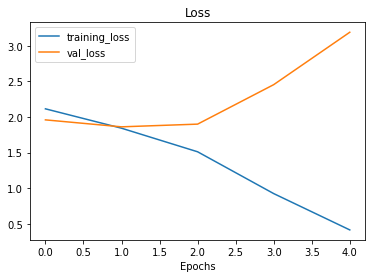

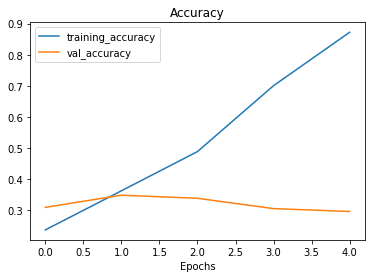

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting right results on training data, but fails to generalise well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat baseline/reduce overfitting)

Due to its performance on the training data, it's clear that our model is learning something..

However it's not generalizing well to unseen data (overfitting).

So let's try and fix overfitting by..

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce number of layers or reduce number of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try to simplify our model first?
# Let's try to remove 2 convolutional layers...

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 237ms/step - loss: 2.1596 - accuracy: 0.2361 - val_loss: 1.9859 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8182 - accuracy: 0.3825 - val_loss: 1.9399 - val_accuracy: 0.3060
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.5556 - accuracy: 0.4776 - val_loss: 1.9653 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 60s 254ms/step - loss: 1.1722 - accuracy: 0.6259 - val_loss: 2.1729 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 54s 229ms/step - loss: 0.7077 - accuracy: 0.7860 - val_loss: 2.5291 - val_accuracy: 0.3024


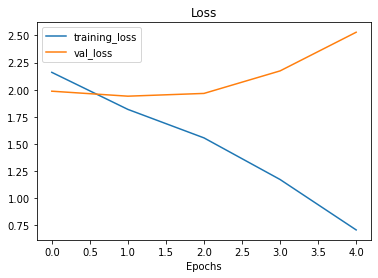

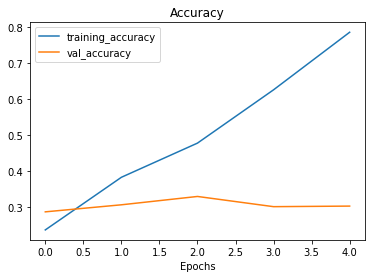

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplified" model experiment didn't work... The accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 507ms/step - loss: 2.2936 - accuracy: 0.1115 - val_loss: 2.2022 - val_accuracy: 0.1804
Epoch 2/5
235/235 [==============================] - 123s 523ms/step - loss: 2.1925 - accuracy: 0.1929 - val_loss: 2.0469 - val_accuracy: 0.2624
Epoch 3/5
235/235 [==============================] - 133s 568ms/step - loss: 2.0886 - accuracy: 0.2483 - val_loss: 1.9625 - val_accuracy: 0.2976
Epoch 4/5
235/235 [==============================] - 116s 496ms/step - loss: 2.0470 - accuracy: 0.2669 - val_loss: 1.9213 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 145s 616ms/step - loss: 2.0126 - accuracy: 0.2944 - val_loss: 1.8777 - val_accuracy: 0.3464


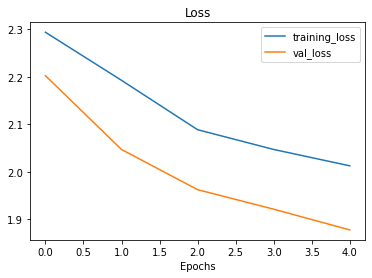

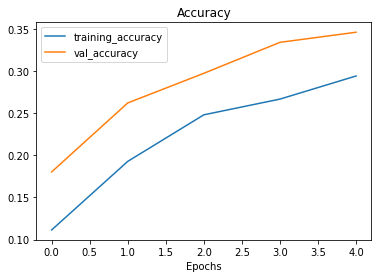

In [ ]:
# Check out loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restrucuring our model's architecture (increasing layers/hidden units)
- adjust learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-03-14 23:26:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-03-14 23:26:34 (60.5 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-03-14 23:26:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

1/1 [==============================] - 0s 20ms/step


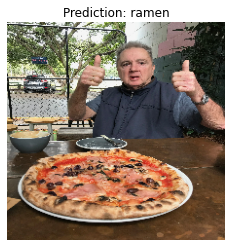

In [ ]:
# Make prediction using model_10
pred_and_plot_categorical(model_10, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 20ms/step


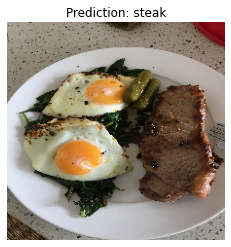

In [ ]:
pred_and_plot_categorical(model_10, "03-steak.jpeg")

1/1 [==============================] - 0s 19ms/step


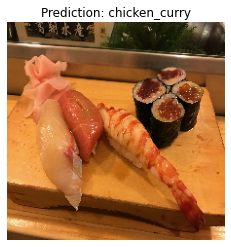

In [ ]:
pred_and_plot_categorical(model_10, "03-sushi.jpeg")

1/1 [==============================] - 0s 29ms/step


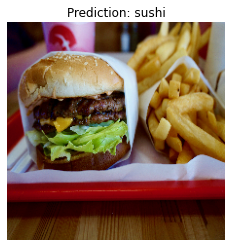

In [ ]:
pred_and_plot_categorical(model_10, "03-hamburger.jpeg")

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 180ms/step - loss: 1.8777 - accuracy: 0.3464


[1.877745270729065, 0.3463999927043915]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8777 - accuracy: 0.3464


[1.877745270729065, 0.3463999927043915]